In [1]:
from neuralnet import *
from checker import *
import matplotlib.pyplot as plt
import numpy as np

## Data Normalization and Label one hot encoding

In [2]:
# Importing train images 
images, labels = load_data('./', mode = 'train')

# shuffling the training dataset
N = np.random.permutation(np.arange(labels.shape[0]))
images = images[N,:]
labels = labels[N]

# pick the first 10000 data for validation
val_images = images[0:10000,:]
val_labels = labels[0:10000]

# normalizing the images and one_hot encoding the labels (validation set)
val_images = normalize_data(val_images)
val_labels = one_hot_encoding(val_labels)

# leave the rest of the data for training
train_images = images[10000:,:]
train_labels = labels[10000:]

# normalizing the images and one_hot encoding the labels (train set)
train_images = normalize_data(train_images)
train_labels = one_hot_encoding(train_labels)

# Importing test images
test_images, test_labels = load_data('./', mode = 't10k')

# shuffling the test dataset
N = np.random.permutation(np.arange(test_labels.shape[0]))


test_images = test_images[N,:]
test_labels = test_labels[N]

# normalizing the images and one_hot encoding the labels (test set)
test_images = normalize_data(test_images)
test_labels = one_hot_encoding(test_labels)

In [3]:
config = load_config('./')
model = Neuralnetwork(config)

At Epoch 0 train_loss is:  0.161316437742 val_loss is:  0.16489235837
At Epoch 1 train_loss is:  0.152804167975 val_loss is:  0.158499911031
At Epoch 2 train_loss is:  0.14210163788 val_loss is:  0.156028288302
At Epoch 3 train_loss is:  0.139735684797 val_loss is:  0.156591148016
At Epoch 4 train_loss is:  0.147370332478 val_loss is:  0.154228500809
At Epoch 5 train_loss is:  0.145310626946 val_loss is:  0.152113042907
At Epoch 6 train_loss is:  0.137200292165 val_loss is:  0.151605637887
At Epoch 7 train_loss is:  0.145408371216 val_loss is:  0.15259257454
At Epoch 8 train_loss is:  0.138465444621 val_loss is:  0.150455527908
At Epoch 9 train_loss is:  0.144760500528 val_loss is:  0.150610457589
At Epoch 10 train_loss is:  0.141859462338 val_loss is:  0.15209570492
At Epoch 11 train_loss is:  0.145641028484 val_loss is:  0.15053552129
At Epoch 12 train_loss is:  0.128308488169 val_loss is:  0.150469497524
At Epoch 13 train_loss is:  0.162868015574 val_loss is:  0.151853477178
At Epoc

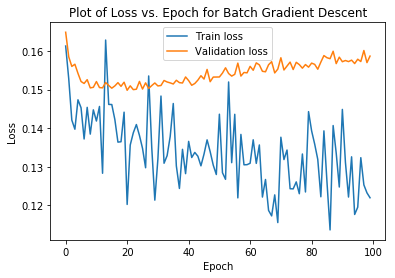

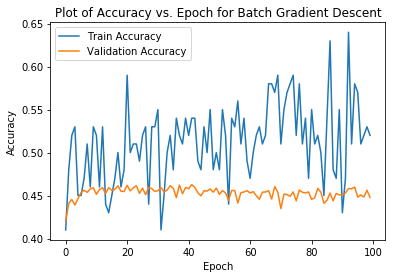

In [4]:
best_val_loss, best_epoch, params = train(model, train_images, train_labels, val_images, val_labels, config)

In [ ]:
a = np.array(np.random.rand(3,4))
a

In [ ]:
np.argmax(a, axis =0)

In [ ]:
best_val_loss, best_epoch, params = train(model, train_images, train_labels, val_images, val_labels, config)